## Problem Statement
Extract reviews of any product from ecommerce website like amazon<br>
Perform emotion mining

### Scrapping Product Reviews from Amazon

Web scraping is the process of using bots to extract content and data from a website. Unlike screen scraping, which only copies pixels displayed onscreen, web scraping extracts underlying HTML code and, with it, data stored in a database. The scraper can then replicate entire website content elsewhere

In [2]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [3]:
product="oneplus+mobile+phones"

In [4]:
base_url="https://www.amazon.com/s?k"

In [5]:
url=base_url+product
url

'https://www.amazon.com/s?koneplus+mobile+phones'

In [6]:
header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36',
        'referer':'https://www.amazon.com/s?k=oneplus+mobile+phones&sprefix=oneplus+mobile%2Caps%2C290&ref=nb_sb_ss_ts-doa-p_2_14'}

In [7]:
search_response=requests.get(url,headers=header)

In [8]:
search_response.status_code

200

In [9]:
search_response.text

'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){

In [10]:
search_response.cookies

<RequestsCookieJar[Cookie(version=0, name='skin', value='noskin', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='ubid-main', value='131-0298960-9682838', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1710583425, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False)]>

### Function to get the content of the page of required query 

In [11]:
cookie={} #insert request cookies within{}

def getAmazonSearch(product):
    url="https://www.amazon.com/s?k="+product
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

#### Function to get the contents of individual product pages using ‘data-asin’ number (unique identification number)

Data asin number is a unique number for every single product listed on amazon. Using this number and adding to base url we can go to every single product page and scrape data, so this is the main point of all this script.

In [12]:
def Searchasin(asin):
    url="https://www.amazon.com/dp/"+asin
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

#### Function to pass on the link of ‘see all reviews’ and extract the content

This function will help us to go to all products using asin number and then grab the links for `see all reviews`

In [13]:
def Searchreviews(review_link):
    url="https://www.amazon.com"+review_link
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

#### Now let’s grab the asin number of all products and save it into a list

In [14]:
data_asin=[]
response=getAmazonSearch('oneplus+mobile+phones')
soup=BeautifulSoup(response.content)
for a in soup.findAll("div",{'class':"sg-col-20-of-24 s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 AdHolder sg-col s-widget-spacing-small sg-col-12-of-16"}):
    data_asin.append(a['data-asin'])

https://www.amazon.com/s?k=oneplus+mobile+phones


In [15]:
response.status_code

200

In [16]:
data_asin

['B0BNWQC9FJ',
 'B0B14LBNL6',
 'B09T2QF3MP',
 'B09X7FF6S2',
 'B09X7D6GL1',
 'B0BB2L2THR']

In [17]:
len(data_asin)

6

### Passing the data-asin numbers, we can extract the ‘see all reviews’ link for each product in the page

In [18]:
link=[]
for i in range(len(data_asin)):
    response=Searchasin(data_asin[i])
    soup=BeautifulSoup(response.content)
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])

https://www.amazon.com/dp/B0BNWQC9FJ
https://www.amazon.com/dp/B0B14LBNL6
https://www.amazon.com/dp/B09T2QF3MP
https://www.amazon.com/dp/B09X7FF6S2
https://www.amazon.com/dp/B09X7D6GL1
https://www.amazon.com/dp/B0BB2L2THR


In [19]:
len(link)

9

In [20]:
link

['/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Tracfone-Nokia-2760-Flip-Black/product-reviews/B09T2QF3MP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-

In [21]:
reviews=[]
for j in range(len(link)):
    for k in range(100):
        response=Searchreviews(link[j]+'&pageNumber='+str(k))
        soup=BeautifulSoup(response.content)
        for i in soup.findAll("span",{'data-hook':"review-body"}):
            reviews.append(i.text)

https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&

https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=50
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=

https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=96
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=97
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=98
https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Processor/product-reviews/B0BNWQC9FJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=99
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerTy

https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=45
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=47
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5

https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=95
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=96
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=97
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=98
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=99
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0

https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=45
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=47
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5

https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=95
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=96
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=97
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=98
https://www.amazon.com/OnePlus-Android-Display-Unlocked-Charging/product-reviews/B0B14LBNL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=99
https://www.amazon.com/Tracfone-Nokia-2760-Flip-Black/product-reviews/B09T2QF3MP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://ww

https://www.amazon.com/Tracfone-Nokia-2760-Flip-Black/product-reviews/B09T2QF3MP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/Tracfone-Nokia-2760-Flip-Black/product-reviews/B09T2QF3MP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/Tracfone-Nokia-2760-Flip-Black/product-reviews/B09T2QF3MP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=50
https://www.amazon.com/Tracfone-Nokia-2760-Flip-Black/product-reviews/B09T2QF3MP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/Tracfone-Nokia-2760-Flip-Black/product-reviews/B09T2QF3MP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/Tracfone-Nokia-2760-Flip-Black/product-reviews/B09T2QF3MP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/Tracfone-Nokia-2760-Flip-Black/product-re

https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://ww

https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
http

https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://ww

https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7FF6S2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
http

https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://ww

https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/TracFone-Nokia-Prepaid-Smartphone-Locked/product-reviews/B09X7D6GL1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
http

https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_

https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=50
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show

https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=95
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=96
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=97
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=98
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=99
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show

https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=42
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=43
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=44
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=45
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show

https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=89
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=90
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=91
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=92
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=93
https://www.amazon.com/UMIDIGI-Rugged-Unlocked-Smartphone-6150mAh-Android/product-reviews/B0BB2L2THR/ref=cm_cr_dp_d_show

In [22]:
len(reviews)

885

### We have got our reviews let’s save it to a pandas data frame

In [23]:
rev={'Reviews':reviews}

In [24]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [25]:
review_data.head(10)

,Reviews
0,"\nI've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages.\n"
1,"\nThis is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB..."
2,"\nI'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher crashes out of box not sure what that is about.Scrolling smoothness is somehow less smooth than my 4 y/o phone, not sure if it's a refresh issue but annoying no matter.Outdoor screen brightness is quite poor compared to what I had expected. Nowhere near iPhone 13 Pro, and at times seems worse again than my 4 y/o phone.Will it meet my needs? Likely. Does it meet my expectations at this level for OnePlus? Not really.\n"
3,"\nEl teléfono es una excelente maquina, velocidad, pantalla, cámara excelente, batería, carga rápida,DOBLE SIM Y RECIBE ESIM TAMBIÉN, pero nada es perfecto, estando enamorado del teléfono me acuesto y olvidé prender el aire acondicionado y pensé voy a prenderlo con el OnePlus 11 como lo hacía mi xiaomi 10tpro, por ir y wala no tiene ir el one plus decepción número uno aunque no es muy relevante seguiré haciendo updates\n"
4,"\nI tried so many phones to upgrade from my oneplus 8 pro that my brother started making fun of me.I tried Sony Xperia 4, iPhone 13, galaxy s22, and oneplus 7 pro. And I didn't like ANY of them.They had better cameras for sure. Especially the iPhone was my favorite, but I hated using most of them. The s22 and pixel 7 pro were awful to hold, it felt like I held a brick all day. I use nova launcher and pie control for more efficient navigation and the pixel had issues that made it difficult to use. Oh also, the fingerprint reader was so bad and unreliable. Sony Xperia was a cool experience, but overall I didn't like it, iPhone I kept and use but just as a ""pro camera"" and s22 I returned in a heartbeat.Now, the oneplus I can't stop holding and using. Even before I transferred everything o..."
5,"\nThe performance and price of the mobile phone are very good, but I just can’t buy a mobile phone case. The online order may arrive next month. I dare not use a mobile phone without a mobile phone case😂, maybe this mobile phone brand is relatively small.Now I found a problem. Sometimes the screen will not respond. It has been several times and I don’t know if I should return the product.\n"
6,"\nI was nervous to buy this phone on Amazon lol, but I gave in after a week of searching between OnePlus 11,s23ultra and the pixel 7pro. I had a galaxy s10, n a OnePlus 8 I hated the s10, but loved the OnePlus 8 more than any phone I've ever had!n the on

In [26]:
review_data.to_csv("Reviews_on_oneplus.csv")

In [27]:
#!pip install textblob

In [28]:
#importing requried libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[

In [29]:
#importing dataset using pandas
data=pd.read_csv('Reviews_on_oneplus.csv',encoding='Latin-1',index_col=0)

### Performing EDA on dataset

In [30]:
# Displaying first 5 records
data.head()

,Reviews
0,"\nI've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages.\n"
1,"\nThis is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB..."
2,"\nI'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher crashes out of box not sure what that is about.Scrolling smoothness is somehow less smooth than my 4 y/o phone, not sure if it's a refresh issue but annoying no matter.Outdoor screen brightness is quite poor compared to what I had expected. Nowhere near iPhone 13 Pro, and at times seems worse again than my 4 y/o phone.Will it meet my needs? Likely. Does it meet my expectations at this level for OnePlus? Not really.\n"
3,"\nEl telÃ©fono es una excelente maquina, velocidad, pantalla, cÃ¡mara excelente, baterÃ­a, carga rÃ¡pida,DOBLE SIM Y RECIBE ESIM TAMBIÃN, pero nada es perfecto, estando enamorado del telÃ©fono me acuesto y olvidÃ© prender el aire acondicionado y pensÃ© voy a prenderlo con el OnePlus 11 como lo hacÃ­a mi xiaomi 10tpro, por ir y wala no tiene ir el one plus decepciÃ³n nÃºmero uno aunque no es muy relevante seguirÃ© haciendo updates\n"
4,"\nI tried so many phones to upgrade from my oneplus 8 pro that my brother started making fun of me.I tried Sony Xperia 4, iPhone 13, galaxy s22, and oneplus 7 pro. And I didn't like ANY of them.They had better cameras for sure. Especially the iPhone was my favorite, but I hated using most of them. The s22 and pixel 7 pro were awful to hold, it felt like I held a brick all day. I use nova launcher and pie control for more efficient navigation and the pixel had issues that made it difficult to use. Oh also, the fingerprint reader was so bad and unreliable. Sony Xperia was a cool experience, but overall I didn't like it, iPhone I kept and use but just as a ""pro camera"" and s22 I returned in a heartbeat.Now, the oneplus I can't stop holding and using. Even before I transferred everything o..."


In [31]:
# Displaying last 5 records
data.tail()

,Reviews
880,\nReceived the phone and discovered it can't upgrade; there's a few newer firmware listed on the umidigi forum but nothing works for the device I recieved. A factory reset doesn't reconcile the upgrade stuck at 99%.\n
881,"\nNever used the finger print reader, but long lasting battery life was good.and a reasonable price but the phone is not reliable.\n"
882,\nã¤ã³ã¹ãã¼ã«æããã¨ã©ã¼ãå¤ããä½åº¦ããã¦ã³ãã¾ããSIMã®èªè­ãä¸å®å®ã§ããè¯ãç¹ã¯ãSDã«ã¼ããã·ã¹ãã ã¡ã¢ãªã¼ã«å©ç¨å¯è½ãªç¹ã§ããããã¼ããããå¿ è¦ã§ããã®å¾ã¯è¨æ¶åªä½ã¨ã¯ä½¿ç¨åºæ¥ãªããªãã¾ããç§ã¯ããã½ã³ã³ã§ãã©ã¼ããããã¦å¾©æ§ãã¾ããã\n
883,\nèè¡æé²æ°´ã¹ãããæ¬²ããã¦ãã¶ã¤ã³ãã¹ããã¯ãä¾¡æ ¼ãªã©ãæ¯ã¹ã¦ç´å¾ã®ããç©ãåºãã®ã§è³¼å ¥éãã²ã¼ã ãããªãç§ã«ã¨ã£ã¦ã¯åä½ããµã¯ãµã¯ã§ã¹ãã©ãããã¼ã«ãUSBæ¥ç¶é¨ã®èãªãã¿ã¤ããªã©ããªãçæ³ã«è¿ãã£ãã®ã§ããããºã¬ãæ´ãã ããã1æ¥ã«2~3åã»ã©ãã£ã¦ã«åèµ·å(ä½¿ç¨ä¸­ãå¾ æ©ä¸­é¢ä¿ãªã)ãã¦ãã¾ãåæä¸è¯ãããåèµ·åããªã»ãããã¦ãç´ããè¿åãã¾ããçæ³ã«è¿ãã¹ããã¯ã ã£ãã®ã§ããªãæ®å¿µã§ã\n
884,"\nI purchased this phone in December of last year. Everything was working fine. The camera is great, the processor is very fast, watching video was no problem and the phone clarity was perfect. The rugged design is exactly as promised, quite durable.However, a few days ago, when I got up from bed, it dropped from bed, on a THICK, CARPETED floor, not even a few feet. I plugged it in, but the screen WILL NOT turn on.- rebooting, didn't work.- charging all night, didn't work- plugging into the computer, didn't workNOTHING WORKSThe pic included is what happens when you plug it it: NOTHING.I am a fair person, so until the manufacturer honors the warranty, it'll have to stay at the 1-star rating. This is only a 3 MONTH old phone, so contact me asap.\n"


In [32]:
# View dimensions of dataset
data.shape

(885, 1)

<h4>Dataset has 1273 rows and 1 column</h4>

In [33]:
data.columns

Index(['Reviews'], dtype='object')

#### Missing values in variables

In [34]:
# check missing values in variables
data.isnull().sum()

Reviews    2
dtype: int64

<b>There are 3 missing records</b>

In [35]:
# Drop missing records
data.dropna(inplace=True)
data.isnull().sum()

Reviews    0
dtype: int64

<b>Now there is no any missing value

### Text Processing

In [36]:
# number of words
#data['word_count']=data['Reviews'].apply(lambda x: len(str(x).split(" ")))
# number of characters 
#data['char_count']=data['Reviews'].str.len()
# number of stopwords
#from nltk.corpus import stopwords
#stop = stopwords.words('english')
#data['stopwords']=data['Reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
# number of special characters
#data['hashtags']=data['Reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
# number of numerics
#data['numerics']=data['Reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
## number of Upperwords
#data['upper']=data['Reviews'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
# drop the words from the datasets which has no impact on analysis 
#data.drop(['numerics','hashtags','stopwords','char_count','word_count','upper'],axis=1,inplace=True)

### N-grams
N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.
Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

In [37]:
# unigram
TextBlob(data['Reviews'][3]).ngrams(1)

[WordList(['El']),
 WordList(['telÃ©fono']),
 WordList(['es']),
 WordList(['una']),
 WordList(['excelente']),
 WordList(['maquina']),
 WordList(['velocidad']),
 WordList(['pantalla']),
 WordList(['cÃ¡mara']),
 WordList(['excelente']),
 WordList(['baterÃ\xada']),
 WordList(['carga']),
 WordList(['rÃ¡pida']),
 WordList(['DOBLE']),
 WordList(['SIM']),
 WordList(['Y']),
 WordList(['RECIBE']),
 WordList(['ESIM']),
 WordList(['TAMBIÃ\x89N']),
 WordList(['pero']),
 WordList(['nada']),
 WordList(['es']),
 WordList(['perfecto']),
 WordList(['estando']),
 WordList(['enamorado']),
 WordList(['del']),
 WordList(['telÃ©fono']),
 WordList(['me']),
 WordList(['acuesto']),
 WordList(['y']),
 WordList(['olvidÃ©']),
 WordList(['prender']),
 WordList(['el']),
 WordList(['aire']),
 WordList(['acondicionado']),
 WordList(['y']),
 WordList(['pensÃ©']),
 WordList(['voy']),
 WordList(['a']),
 WordList(['prenderlo']),
 WordList(['con']),
 WordList(['el']),
 WordList(['OnePlus']),
 WordList(['11']),
 WordList([

In [38]:
# bigram
TextBlob(data['Reviews'][4]).ngrams(2)

[WordList(['I', 'tried']),
 WordList(['tried', 'so']),
 WordList(['so', 'many']),
 WordList(['many', 'phones']),
 WordList(['phones', 'to']),
 WordList(['to', 'upgrade']),
 WordList(['upgrade', 'from']),
 WordList(['from', 'my']),
 WordList(['my', 'oneplus']),
 WordList(['oneplus', '8']),
 WordList(['8', 'pro']),
 WordList(['pro', 'that']),
 WordList(['that', 'my']),
 WordList(['my', 'brother']),
 WordList(['brother', 'started']),
 WordList(['started', 'making']),
 WordList(['making', 'fun']),
 WordList(['fun', 'of']),
 WordList(['of', 'me.I']),
 WordList(['me.I', 'tried']),
 WordList(['tried', 'Sony']),
 WordList(['Sony', 'Xperia']),
 WordList(['Xperia', '4']),
 WordList(['4', 'iPhone']),
 WordList(['iPhone', '13']),
 WordList(['13', 'galaxy']),
 WordList(['galaxy', 's22']),
 WordList(['s22', 'and']),
 WordList(['and', 'oneplus']),
 WordList(['oneplus', '7']),
 WordList(['7', 'pro']),
 WordList(['pro', 'And']),
 WordList(['And', 'I']),
 WordList(['I', 'did']),
 WordList(['did', "n't"]

In [39]:
# trigram
TextBlob(data['Reviews'][4]).ngrams(3)

[WordList(['I', 'tried', 'so']),
 WordList(['tried', 'so', 'many']),
 WordList(['so', 'many', 'phones']),
 WordList(['many', 'phones', 'to']),
 WordList(['phones', 'to', 'upgrade']),
 WordList(['to', 'upgrade', 'from']),
 WordList(['upgrade', 'from', 'my']),
 WordList(['from', 'my', 'oneplus']),
 WordList(['my', 'oneplus', '8']),
 WordList(['oneplus', '8', 'pro']),
 WordList(['8', 'pro', 'that']),
 WordList(['pro', 'that', 'my']),
 WordList(['that', 'my', 'brother']),
 WordList(['my', 'brother', 'started']),
 WordList(['brother', 'started', 'making']),
 WordList(['started', 'making', 'fun']),
 WordList(['making', 'fun', 'of']),
 WordList(['fun', 'of', 'me.I']),
 WordList(['of', 'me.I', 'tried']),
 WordList(['me.I', 'tried', 'Sony']),
 WordList(['tried', 'Sony', 'Xperia']),
 WordList(['Sony', 'Xperia', '4']),
 WordList(['Xperia', '4', 'iPhone']),
 WordList(['4', 'iPhone', '13']),
 WordList(['iPhone', '13', 'galaxy']),
 WordList(['13', 'galaxy', 's22']),
 WordList(['galaxy', 's22', 'and'

In [40]:
data = [Reviews.strip() for Reviews in data.Reviews] # remove both the leading and the trailing characters like space befor word 
data = [Reviews for Reviews in data if Reviews] # removes empty strings, because they are considered in Python as False
data[0:10]

["I've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages.",
 "This is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution a

In [41]:
# Joining the list into one string/text
data_text=' '.join(data)
data_text

'I\'ve always been a OnePlus fan. There\'s one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn\'t automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It\'s annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It\'s fast. The battery last all day. The 120 screen scrolls flawlessly on pages. This is my first OnePlus phone, and dare I say this the best experience I\'ve had with a cellphone. It\'s not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution

In [42]:
# Remove Punctuations 
no_punc_text=data_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'Ive always been a OnePlus fan Theres one issue with their phones which may lead me to buy a different brand If you plan on using this on Verizon Wifi calling will be unavailable Second if you drop signal the phone doesnt automatically reconnect when you are back in the service area You will either have to restart the phone or enter airplane mode for 8 seconds Its annoying If you are on any other network I highly recommend this phone The camera is fantastic Its fast The battery last all day The 120 screen scrolls flawlessly on pages This is my first OnePlus phone and dare I say this the best experience Ive had with a cellphone Its not a perfect phone but it specs deliver in the areas that matter Excellent battery I get 15 days of use before I need to charge it again plus the charging speed is amazing great screen quality and the performace of the processor is great This phone with the Snapdragon 8 Gen 2 16GB RAM simply rocks Great screen resolution and smooth 120Hz that can dynamically

### Tokenizing Text into individual words for further pre-processing

In [43]:
import nltk.data
from nltk.tokenize import word_tokenize

text_tokens=word_tokenize(no_punc_text)
print(text_tokens[:100])

['Ive', 'always', 'been', 'a', 'OnePlus', 'fan', 'Theres', 'one', 'issue', 'with', 'their', 'phones', 'which', 'may', 'lead', 'me', 'to', 'buy', 'a', 'different', 'brand', 'If', 'you', 'plan', 'on', 'using', 'this', 'on', 'Verizon', 'Wifi', 'calling', 'will', 'be', 'unavailable', 'Second', 'if', 'you', 'drop', 'signal', 'the', 'phone', 'doesnt', 'automatically', 'reconnect', 'when', 'you', 'are', 'back', 'in', 'the', 'service', 'area', 'You', 'will', 'either', 'have', 'to', 'restart', 'the', 'phone', 'or', 'enter', 'airplane', 'mode', 'for', '8', 'seconds', 'Its', 'annoying', 'If', 'you', 'are', 'on', 'any', 'other', 'network', 'I', 'highly', 'recommend', 'this', 'phone', 'The', 'camera', 'is', 'fantastic', 'Its', 'fast', 'The', 'battery', 'last', 'all', 'day', 'The', '120', 'screen', 'scrolls', 'flawlessly', 'on', 'pages', 'This']


### Removing the stopwords from the text

In [44]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['I','a','on','the','all','if','Yes']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['Ive', 'always', 'OnePlus', 'fan', 'Theres', 'one', 'issue', 'phones', 'may', 'lead', 'buy', 'different', 'brand', 'If', 'plan', 'using', 'Verizon', 'Wifi', 'calling', 'unavailable', 'Second', 'drop', 'signal', 'phone', 'doesnt', 'automatically', 'reconnect', 'back', 'service', 'area', 'You', 'either', 'restart', 'phone', 'enter', 'airplane', 'mode', '8', 'seconds', 'Its', 'annoying', 'If', 'network', 'highly', 'recommend', 'phone', 'The', 'camera', 'fantastic', 'Its', 'fast', 'The', 'battery', 'last', 'day', 'The', '120', 'screen', 'scrolls', 'flawlessly', 'pages', 'This', 'first', 'OnePlus', 'phone', 'dare', 'say', 'best', 'experience', 'Ive', 'cellphone', 'Its', 'perfect', 'phone', 'specs', 'deliver', 'areas', 'matter', 'Excellent', 'battery', 'get', '15', 'days', 'use', 'need', 'charge', 'plus', 'charging', 'speed', 'amazing', 'great', 'screen', 'quality', 'performace', 'processor', 'great', 'This', 'phone', 'Snapdragon', '8']


### Making all the Text into Lowercase

In [45]:
# Making the Text in Lowercase
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['ive', 'always', 'oneplus', 'fan', 'theres', 'one', 'issue', 'phones', 'may', 'lead', 'buy', 'different', 'brand', 'if', 'plan', 'using', 'verizon', 'wifi', 'calling', 'unavailable', 'second', 'drop', 'signal', 'phone', 'doesnt', 'automatically', 'reconnect', 'back', 'service', 'area', 'you', 'either', 'restart', 'phone', 'enter', 'airplane', 'mode', '8', 'seconds', 'its', 'annoying', 'if', 'network', 'highly', 'recommend', 'phone', 'the', 'camera', 'fantastic', 'its', 'fast', 'the', 'battery', 'last', 'day', 'the', '120', 'screen', 'scrolls', 'flawlessly', 'pages', 'this', 'first', 'oneplus', 'phone', 'dare', 'say', 'best', 'experience', 'ive', 'cellphone', 'its', 'perfect', 'phone', 'specs', 'deliver', 'areas', 'matter', 'excellent', 'battery', 'get', '15', 'days', 'use', 'need', 'charge', 'plus', 'charging', 'speed', 'amazing', 'great', 'screen', 'quality', 'performace', 'processor', 'great', 'this', 'phone', 'snapdragon', '8']


### Stemming the Text using NLTK Library

In [46]:
# Stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['ive', 'alway', 'oneplu', 'fan', 'there', 'one', 'issu', 'phone', 'may', 'lead', 'buy', 'differ', 'brand', 'if', 'plan', 'use', 'verizon', 'wifi', 'call', 'unavail', 'second', 'drop', 'signal', 'phone', 'doesnt', 'automat', 'reconnect', 'back', 'servic', 'area', 'you', 'either', 'restart', 'phone', 'enter', 'airplan', 'mode', '8', 'second', 'it', 'annoy', 'if', 'network', 'highli', 'recommend', 'phone', 'the', 'camera', 'fantast', 'it', 'fast', 'the', 'batteri', 'last', 'day', 'the', '120', 'screen', 'scroll', 'flawlessli', 'page', 'thi', 'first', 'oneplu', 'phone', 'dare', 'say', 'best', 'experi', 'ive', 'cellphon', 'it', 'perfect', 'phone', 'spec', 'deliv', 'area', 'matter', 'excel', 'batteri', 'get', '15', 'day', 'use', 'need', 'charg', 'plu', 'charg', 'speed', 'amaz', 'great', 'screen', 'qualiti', 'performac', 'processor', 'great', 'thi', 'phone', 'snapdragon', '8']


### Lemmatization of Text data using Spacy library

In [47]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
nlp.max_length= 2220853
doc=nlp(' '.join(lower_words))
print(doc[:100])

ive always oneplus fan theres one issue phones may lead buy different brand if plan using verizon wifi calling unavailable second drop signal phone doesnt automatically reconnect back service area you either restart phone enter airplane mode 8 seconds its annoying if network highly recommend phone the camera fantastic its fast the battery last day the 120 screen scrolls flawlessly pages this first oneplus phone dare say best experience ive cellphone its perfect phone specs deliver areas matter excellent battery get 15 days use need charge plus charging speed amazing great screen quality performace processor great


In [48]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['I', 've', 'always', 'oneplu', 'fan', 'there', 's', 'one', 'issue', 'phone', 'may', 'lead', 'buy', 'different', 'brand', 'if', 'plan', 'use', 'verizon', 'wifi', 'call', 'unavailable', 'second', 'drop', 'signal', 'phone', 'do', 'not', 'automatically', 'reconnect', 'back', 'service', 'area', 'you', 'either', 'restart', 'phone', 'enter', 'airplane', 'mode', '8', 'second', 'its', 'annoying', 'if', 'network', 'highly', 'recommend', 'phone', 'the', 'camera', 'fantastic', 'its', 'fast', 'the', 'battery', 'last', 'day', 'the', '120', 'screen', 'scroll', 'flawlessly', 'page', 'this', 'first', 'oneplus', 'phone', 'dare', 'say', 'good', 'experience', 'I', 've', 'cellphone', 'its', 'perfect', 'phone', 'spec', 'deliver', 'area', 'matter', 'excellent', 'battery', 'get', '15', 'day', 'use', 'need', 'charge', 'plus', 'charge', 'speed', 'amazing', 'great', 'screen', 'quality', 'performace', 'processor', 'great']


In [50]:
clean_reviews=' '.join(lemmas)
clean_reviews[:1000]

'I ve always oneplu fan there s one issue phone may lead buy different brand if plan use verizon wifi call unavailable second drop signal phone do not automatically reconnect back service area you either restart phone enter airplane mode 8 second its annoying if network highly recommend phone the camera fantastic its fast the battery last day the 120 screen scroll flawlessly page this first oneplus phone dare say good experience I ve cellphone its perfect phone spec deliver area matter excellent battery get 15 day use need charge plus charge speed amazing great screen quality performace processor great this phone snapdragon 8 gen 2 16 gb ram simply rock great screen resolution smooth 120hz dynamically scale the camera ok lot well one phone oxygen os ok well somewhat different experience I ve nicethe phone con important no wireless charge really necessary supervooc charge ip64 instead ip68 usb 20 but give price point phone con overlookedconclusion its must get for money hard find well o

### Text Pre-processing techniques

In [54]:
#importing dataset using pandas
reviews=pd.read_csv('Reviews_on_oneplus.csv',encoding='Latin-1',index_col=0)

### Removing @names

In [55]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [56]:
reviews['Reviews']=reviews['Reviews'].apply(str)

In [57]:
# We are keeping cleaned reviews in a new column called 'Clean_Reviews'
reviews['Clean_Reviews'] = np.vectorize(remove_pattern)(reviews['Reviews'], "@[\w]*")
reviews.head(10)

,Reviews,Clean_Reviews
0,"\nI've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages.\n","\nI've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages.\n"
1,"\nThis is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB...","\nThis is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB..."
2,"\nI'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher crashes out of box not sure what that is about.Scrolling smoothness is somehow less smooth than my 4 y/o phone, not sure if it's a refresh issue but annoying no matter.Outdoor screen brightness is quite poor compared to what I had expected. Nowhere near iPhone 13 Pro, and at times seems worse again than my 4 y/o phone.Will it meet my needs? Likely. Does it meet my expectations at this level for OnePlus? Not really.\n","\nI'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher crashes out of box not sure what that is about.Scrolling smoothness is somehow less smooth than my 4 y/o phone, not sure if it's a refresh issue but annoying no matter.Outdoor screen brightness is quite 

### Removing links

In [58]:
cleaned_reviews = []

for index, row in reviews.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

reviews['Clean_Reviews'] = cleaned_reviews
reviews.head(10)

,Reviews,Clean_Reviews
0,"\nI've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages.\n","I've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages."
1,"\nThis is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB...","This is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB 2..."
2,"\nI'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher crashes out of box not sure what that is about.Scrolling smoothness is somehow less smooth than my 4 y/o phone, not sure if it's a refresh issue but annoying no matter.Outdoor screen brightness is quite poor compared to what I had expected. Nowhere near iPhone 13 Pro, and at times seems worse again than my 4 y/o phone.Will it meet my needs? Likely. Does it meet my expectations at this level for OnePlus? Not really.\n","I'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher crashes out of box not sure what that is about.Scrolling smoothness is somehow less smooth than my 4 y/o phone, not sure if it's a refresh issue but annoying no matter.Outdoor screen brightness is quite poor c

In [59]:
# Removing empty text
reviews = reviews[reviews['Clean_Reviews']!='']
reviews.head(10)

,Reviews,Clean_Reviews
0,"\nI've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages.\n","I've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages."
1,"\nThis is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB...","This is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB 2..."
2,"\nI'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher crashes out of box not sure what that is about.Scrolling smoothness is somehow less smooth than my 4 y/o phone, not sure if it's a refresh issue but annoying no matter.Outdoor screen brightness is quite poor compared to what I had expected. Nowhere near iPhone 13 Pro, and at times seems worse again than my 4 y/o phone.Will it meet my needs? Likely. Does it meet my expectations at this level for OnePlus? Not really.\n","I'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher crashes out of box not sure what that is about.Scrolling smoothness is somehow less smooth than my 4 y/o phone, not sure if it's a refresh issue but annoying no matter.Outdoor screen brightness is quite poor c

In [60]:
# Removing Special Characters
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

reviews['Clean_Reviews'] = reviews['Clean_Reviews'].apply(lambda x: clean_text(x))
reviews.head(10)

,Reviews,Clean_Reviews
0,"\nI've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages.\n",ive always been a oneplus fan theres one issue with their phones which may lead me to buy a different brand if you plan on using this on verizon wifi calling will be unavailable second if you drop signal the phone doesnt automatically reconnect when you are back in the service area you will either have to restart the phone or enter airplane mode for seconds its annoying if you are on any other network i highly recommend this phone the camera is fantastic its fast the battery last all day the screen scrolls flawlessly on pages
1,"\nThis is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB...",this is my first oneplus phone and dare i say this the best experience ive had with a cellphone its not a perfect phone but it specs deliver in the areas that matter excellent battery i get days of use before i need to charge it again plus the charging speed is amazing great screen quality and the performace of the processor is great this phone with the snapdragon gen ram simply rocks great screen resolution and smooth that can dynamically scale down the cameras are ok a lot better than the ones my other phones had oxygen os is ok as well somewhat different from other experiences ive had but its nicethe phone has some cons that to me are that important no wireless charging not really necessary with supervooc charging instead of usb but given the price point of this phone this c...
2,"\nI'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher crashes out of box not sure what that is about.Scrolling smoothness is somehow less smooth than my 4 y/o phone, not sure if it's a refresh issue but annoying no matter.Outdoor screen brightness is quite poor compared to what I had expected. Nowhere near iPhone 13 Pro, and at times seems worse again than my 4 y/o phone.Will it meet my needs? Likely. Does it meet my expectations at this level for OnePlus? Not really.\n",im coming from the oneplus pro mclaren and wanted to leave some notesprosphone design is nice feels goodlight in hand but solid build if done again id likely choose black over the greeni guess charging is fastconsoxygenos is clunky feels less stock android than id like oh yes and launcher crashes out of box not sure what that is aboutscrolling smoothness is somehow less smooth than my yo phone not sure if its a refresh issue but annoying no matteroutdoor screen brightness is quite poor compared to what i had expected nowhere near iphone pro and a

In [62]:
# Removing Emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

reviews['Clean_Reviews'] = reviews['Clean_Reviews'].apply(lambda x: remove_emoji(x))
reviews['tokenized_Reviews'] = reviews['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
reviews.drop(['tokenized_Reviews'],axis=1,inplace=True)
reviews.head(10)

,Reviews,Clean_Reviews
0,"\nI've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages.\n",ive always been a oneplus fan theres one issue with their phones which may lead me to buy a different brand if you plan on using this on verizon wifi calling will be unavailable second if you drop signal the phone doesnt automatically reconnect when you are back in the service area you will either have to restart the phone or enter airplane mode for seconds its annoying if you are on any other network i highly recommend this phone the camera is fantastic its fast the battery last all day the screen scrolls flawlessly on pages
1,"\nThis is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB...",this is my first oneplus phone and dare i say this the best experience ive had with a cellphone its not a perfect phone but it specs deliver in the areas that matter excellent battery i get days of use before i need to charge it again plus the charging speed is amazing great screen quality and the performace of the processor is great this phone with the snapdragon gen ram simply rocks great screen resolution and smooth that can dynamically scale down the cameras are ok a lot better than the ones my other phones had oxygen os is ok as well somewhat different from other experiences ive had but its nicethe phone has some cons that to me are that important no wireless charging not really necessary with supervooc charging instead of usb but given the price point of this phone this c...
2,"\nI'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher crashes out of box not sure what that is about.Scrolling smoothness is somehow less smooth than my 4 y/o phone, not sure if it's a refresh issue but annoying no matter.Outdoor screen brightness is quite poor compared to what I had expected. Nowhere near iPhone 13 Pro, and at times seems worse again than my 4 y/o phone.Will it meet my needs? Likely. Does it meet my expectations at this level for OnePlus? Not really.\n",im coming from the oneplus pro mclaren and wanted to leave some notesprosphone design is nice feels goodlight in hand but solid build if done again id likely choose black over the greeni guess charging is fastconsoxygenos is clunky feels less stock android than id like oh yes and launcher crashes out of box not sure what that is aboutscrolling smoothness is somehow less smooth than my yo phone not sure if its a refresh issue but annoying no matteroutdoor screen brightness is quite poor compared to what i had expected nowhere near iphone pro and a

#### Removing Stop words

In [64]:
import codecs
with codecs.open("C:/Users/HP/ExcelR/Assignment/Text Mining/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])
stop.split(" ")

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [65]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in reviews.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
reviews['absolute_Clean_Reviews'] = cleaned_tweets
reviews.head(10)

,Reviews,Clean_Reviews,absolute_Clean_Reviews
0,"\nI've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages.\n",ive always been a oneplus fan theres one issue with their phones which may lead me to buy a different brand if you plan on using this on verizon wifi calling will be unavailable second if you drop signal the phone doesnt automatically reconnect when you are back in the service area you will either have to restart the phone or enter airplane mode for seconds its annoying if you are on any other network i highly recommend this phone the camera is fantastic its fast the battery last all day the screen scrolls flawlessly on pages,ive always oneplus fan theres one issue phones may lead buy different brand plan using verizon wifi calling unavailable second drop signal phone doesnt automatically reconnect back service area either restart phone enter airplane mode seconds annoying network highly recommend phone camera fantastic fast battery last day screen scrolls flawlessly pages
1,"\nThis is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB...",this is my first oneplus phone and dare i say this the best experience ive had with a cellphone its not a perfect phone but it specs deliver in the areas that matter excellent battery i get days of use before i need to charge it again plus the charging speed is amazing great screen quality and the performace of the processor is great this phone with the snapdragon gen ram simply rocks great screen resolution and smooth that can dynamically scale down the cameras are ok a lot better than the ones my other phones had oxygen os is ok as well somewhat different from other experiences ive had but its nicethe phone has some cons that to me are that important no wireless charging not really necessary with supervooc charging instead of usb but given the price point of this phone this c...,first oneplus phone dare say best experience ive cellphone perfect phone specs deliver areas matter excellent battery get days use need charge plus charging speed amazing great screen quality performace processor great phone snapdragon gen ram simply rocks great screen resolution smooth dynamically scale cameras ok lot better ones phones oxygen os ok well somewhat different experiences ive nicethe phone cons important wireless charging really necessary supervooc charging instead usb given price point phone cons overlookedconclusion must get money hard find better option cuts corners worth
2,"\nI'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher c

### Tokenize 'absolute_tidy_tweets'

In [66]:
tokenized_reviews = reviews['absolute_Clean_Reviews'].apply(lambda x: x.split())
tokenized_reviews.head(10)

0                                                                                                                                                                                                                                                                                                                                                                                                              [ive, always, oneplus, fan, theres, one, issue, phones, may, lead, buy, different, brand, plan, using, verizon, wifi, calling, unavailable, second, drop, signal, phone, doesnt, automatically, reconnect, back, service, area, either, restart, phone, enter, airplane, mode, seconds, annoying, network, highly, recommend, phone, camera, fantastic, fast, battery, last, day, screen, scrolls, flawlessly, pages]
1                                                                                                                         [first, oneplus, phone, dare, say, best, experience, ive, cellphone, perf

### Converting words to Lemmas

In [67]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_reviews = tokenized_reviews.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_reviews.head(10)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


0                                                                                                                                                                                                                                                                                                                                                                                                                   [ive, always, oneplus, fan, there, one, issue, phone, may, lead, buy, different, brand, plan, using, verizon, wifi, calling, unavailable, second, drop, signal, phone, doesnt, automatically, reconnect, back, service, area, either, restart, phone, enter, airplane, mode, second, annoying, network, highly, recommend, phone, camera, fantastic, fast, battery, last, day, screen, scroll, flawlessly, page]
1                                                                                                                                      [first, oneplus, phone, dare, say, best, experience, ive, ce

### Joining all tokens into sentences

In [68]:
for i, tokens in enumerate(tokenized_reviews):
    tokenized_reviews[i] = ' '.join(tokens)

reviews['absolute_Clean_Reviews'] = tokenized_reviews
reviews.head(10)

,Reviews,Clean_Reviews,absolute_Clean_Reviews
0,"\nI've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages.\n",ive always been a oneplus fan theres one issue with their phones which may lead me to buy a different brand if you plan on using this on verizon wifi calling will be unavailable second if you drop signal the phone doesnt automatically reconnect when you are back in the service area you will either have to restart the phone or enter airplane mode for seconds its annoying if you are on any other network i highly recommend this phone the camera is fantastic its fast the battery last all day the screen scrolls flawlessly on pages,ive always oneplus fan there one issue phone may lead buy different brand plan using verizon wifi calling unavailable second drop signal phone doesnt automatically reconnect back service area either restart phone enter airplane mode second annoying network highly recommend phone camera fantastic fast battery last day screen scroll flawlessly page
1,"\nThis is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB...",this is my first oneplus phone and dare i say this the best experience ive had with a cellphone its not a perfect phone but it specs deliver in the areas that matter excellent battery i get days of use before i need to charge it again plus the charging speed is amazing great screen quality and the performace of the processor is great this phone with the snapdragon gen ram simply rocks great screen resolution and smooth that can dynamically scale down the cameras are ok a lot better than the ones my other phones had oxygen os is ok as well somewhat different from other experiences ive had but its nicethe phone has some cons that to me are that important no wireless charging not really necessary with supervooc charging instead of usb but given the price point of this phone this c...,first oneplus phone dare say best experience ive cellphone perfect phone spec deliver area matter excellent battery get day use need charge plus charging speed amazing great screen quality performace processor great phone snapdragon gen ram simply rock great screen resolution smooth dynamically scale camera ok lot better one phone oxygen o ok well somewhat different experience ive nicethe phone con important wireless charging really necessary supervooc charging instead usb given price point phone con overlookedconclusion must get money hard find better option cut corner worth
2,"\nI'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher crashes out of box 

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [70]:
print(cv.get_feature_names()[109:200])

['24æ', '25', '250', '250400', '256', '256ã', '26æ', '270', '275', '280gã', '290', '299', '2day', '2g3g4', '2mineoã', '2mp', '2nd', '2pro', '2sã', '2sï¼', '2x', '2ã', '2ä', '2å', '2å¹', '2æ', '30', '300', '30000', '30fps', '30mbps', '30w', '31', '310mnc', '32', '33', '33w', '33wthe', '34', '35', '350', '36', '371526', '37åº', '39', '3dã', '3x', '3ã', '3å¹', '3ç', '3è', '3ï¼', '40', '400', '4050', '40mb', '43', '435', '45', '4500', '4500mah', '4500mahã', '455', '461647', '46hrs', '48', '48mp', '4a', '4g3g2', '4gje', '4glte', '4gã', '4gå', '4k', '4x', '4å¹', '4æ', '50', '500', '5000', '5000mah', '50ä', '51', '512', '52', '53', '55', '56', '59999', '5a', '5gi']


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [71]:
print(cv.get_feature_names()[:100])

['0000ã', '0100it', '02', '0217', '03aå', '05', '09aï½', '10', '100', '1000', '100dual', '1010', '10142022still', '1020', '1080p', '1080p30fpsno', '1080å', '10bit', '10l', '10tpro', '10å', '10ï¼', '11', '1100', '11212022', '114', '115aç', '11cameras', '11finally', '11s23ultra', '11wç', '11ã', '12', '120', '120hz', '121', '12152022customer', '122aã', '12312022been', '128', '128gã', '129', '12inch', '12only', '12ramã', '12æ', '13', '130', '14', '1440p', '145', '15', '1500', '152', '15a7ï½', '15ã', '15å', '16', '169', '1750', '18', '180', '180hzã', '1k', '1mä½', '1st', '1star', '1ã', '1å', '1æ', '1ç', '20', '200', '2000', '20000', '200but', '200n', '2016', '20182019', '2018å¹', '2019', '2020', '2020å¹', '2021', '2021å¹', '2022', '20221027ï¼', '2022å¹', '2023', '20230227ã', '2023118ï¼', '202336ï¼', '205', '20fps', '20ã', '20ï¼', '2133mhz16', '21999', '22', '22ghz']


### TF-IDF Vectorizer

In [72]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(reviews))):
    review = re.sub('[^a-zA-Z]', ' ', reviews['absolute_Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
corpus[5]

  0%|          | 0/885 [00:00<?, ?it/s]

'perform price mobil phone good buy mobil phone case onlin order may arriv next month dare use mobil phone without mobil phone case mayb mobil phone brand rel smallnow found problem sometim screen respond sever time know return product'

In [73]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [74]:
X.shape

(885, 5000)

In [75]:
tfidf_v.get_feature_names()[:10]

['abil',
 'abl',
 'absolut',
 'absolut love',
 'accept',
 'access',
 'accident',
 'account',
 'accur',
 'activ']

In [76]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [77]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,abil,abl,absolut,absolut love,accept,access,accident,account,accur,activ,...,yo,youd,youll,your,your look,your use,youtub,youv,zero,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.258829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Named Entity Recognition (NER)

In [78]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [79]:
one_block

'I ve always oneplu fan there s one issue phone may lead buy different brand if plan use verizon wifi call unavailable second drop signal phone do not automatically reconnect back service area you either restart phone enter airplane mode 8 second its annoying if network highly recommend phone the camera fantastic its fast the battery last day the 120 screen scroll flawlessly page this first oneplus phone dare say good experience I ve cellphone its perfect phone spec deliver area matter excellent battery get 15 day use need charge plus charge speed amazing great screen quality performace processor great this phone snapdragon 8 gen 2 16 gb ram simply rock great screen resolution smooth 120hz dynamically scale the camera ok lot well one phone oxygen os ok well somewhat different experience I ve nicethe phone con important no wireless charge really necessary supervooc charge ip64 instead ip68 usb 20 but give price point phone con overlookedconclusion its must get for money hard find well o

In [80]:
for token in doc_block[:20]:
    print(token,token.pos_) 

I PRON
ve AUX
always ADV
oneplu ADJ
fan NOUN
there PRON
s VERB
one NUM
issue NOUN
phone NOUN
may AUX
lead VERB
buy VERB
different ADJ
brand NOUN
if SCONJ
plan NOUN
use VERB
verizon ADJ
wifi NOUN


### Filtering out only the nouns and verbs from the Text to Tokens

In [82]:
# Filtering the nouns and verbs only
nlp.max_length = 2136919
one_block=clean_reviews
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['fastconsoxygeno', 'feel', 'stock', 'android', 'launcher', 'yo', 'phone', 'issue', 'matteroutdoor', 'screen', 'brightness', 'compare', 'expect', 'iphone', 'time', 'seem', 'yo', 'phonewill', 'meet', 'need', 'meet', 'expectation', 'level', 'oneplus', 'sim', 'recibe', 'esim', 'pero', 'fono', 'olvidã', 'prender', 'voy', 'nãºmero', 'aunque', 'seguirã', 'haciendo', 'update', 'try', 'phone', 'upgrade', 'oneplus', 'brother', 'start', 'make', 'fun', 'try', 'iphone', 'galaxy', 's22', 'oneplus', 'like', 'camera', 'hate', 'use', 's22', 'hold', 'feel', 'hold', 'brick', 'day', 'use', 'navigation', 'issue', 'make', 'use', 'fingerprint', 'reader', 'experience', 'like', 'iphone', 'use', 'camera', 's22', 'return', 'oneplus', 'stop', 'hold', 'use', 'transfer', 'card', 'use', 'see', 'screen', 'fluidity', 'camera', 'm', 'pic', 'iphone', 'camera', 'oneplus', 'camera', 'take', 'shot', 'time', 's', 'surprise', 'mediocre', 'get', 'year', 'm']


In [83]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,1980
1,use,428
2,work,362
3,get,357
4,camera,352
5,battery,321
6,screen,271
7,price,233
8,ªã,212
9,day,202


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

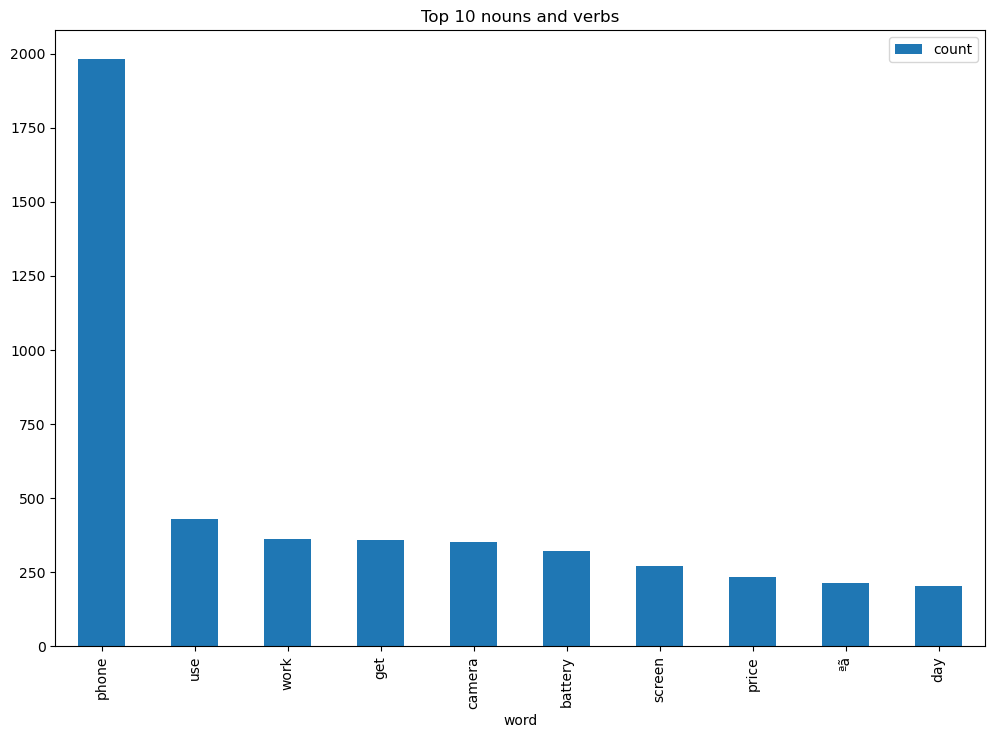

In [84]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

<h4>Observations:</h4>
The word phone has high frequency among the others as its being used many times in the reviews<br>
Because as we scarap the Oneplus mobile phone product from amazon

### Feature Extraction

In [86]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(reviews['absolute_Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(reviews['absolute_Clean_Reviews'])

In [87]:
reviews

,Reviews,Clean_Reviews,absolute_Clean_Reviews
0,"\nI've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second, if you drop signal the phone doesn't automatically reconnect when you are back in the service area. You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast. The battery last all day. The 120 screen scrolls flawlessly on pages.\n",ive always been a oneplus fan theres one issue with their phones which may lead me to buy a different brand if you plan on using this on verizon wifi calling will be unavailable second if you drop signal the phone doesnt automatically reconnect when you are back in the service area you will either have to restart the phone or enter airplane mode for seconds its annoying if you are on any other network i highly recommend this phone the camera is fantastic its fast the battery last all day the screen scrolls flawlessly on pages,ive always oneplus fan there one issue phone may lead buy different brand plan using verizon wifi calling unavailable second drop signal phone doesnt automatically reconnect back service area either restart phone enter airplane mode second annoying network highly recommend phone camera fantastic fast battery last day screen scroll flawlessly page
1,"\nThis is my first OnePlus phone, and dare I say this the best experience I've had with a cellphone. It's not a perfect phone, but it specs deliver in the areas that matter: Excellent battery (I get 1.5 days of use before I need to charge it again) plus the charging speed is amazing, great screen quality and the performace of the processor is great. This phone with the Snapdragon 8 Gen 2, 16GB RAM simply rocks. Great screen resolution and smooth 120Hz that can dynamically scale down. The cameras are ok, a lot better than the ones my other phones had. Oxygen OS is ok as well, somewhat different from other experiences I've had but it's nice.The phone has some cons that to me are that important: No wireless charging (not really necessary with supervooc charging), IP64 instead of IP68, USB...",this is my first oneplus phone and dare i say this the best experience ive had with a cellphone its not a perfect phone but it specs deliver in the areas that matter excellent battery i get days of use before i need to charge it again plus the charging speed is amazing great screen quality and the performace of the processor is great this phone with the snapdragon gen ram simply rocks great screen resolution and smooth that can dynamically scale down the cameras are ok a lot better than the ones my other phones had oxygen os is ok as well somewhat different from other experiences ive had but its nicethe phone has some cons that to me are that important no wireless charging not really necessary with supervooc charging instead of usb but given the price point of this phone this c...,first oneplus phone dare say best experience ive cellphone perfect phone spec deliver area matter excellent battery get day use need charge plus charging speed amazing great screen quality performace processor great phone snapdragon gen ram simply rock great screen resolution smooth dynamically scale camera ok lot better one phone oxygen o ok well somewhat different experience ive nicethe phone con important wireless charging really necessary supervooc charging instead usb given price point phone con overlookedconclusion must get money hard find better option cut corner worth
2,"\nI'm coming from the OnePlus 7 Pro Mclaren and wanted to leave some notes:Pros:Phone design is nice, feels good/light in hand but solid build. If done again I'd likely choose black over the green.I guess charging is fast.Cons:OxygenOS is clunky, feels less stock android than I'd like. Oh yes, and launcher crashes out of box 

### Fetch sentiments

In [88]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [89]:
sentiments_using_SIA = reviews.absolute_Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,absolute_Clean_Reviews
pos,787
neg,98


In [90]:
reviews.Clean_Reviews[5]

'the performance and price of the mobile phone are very good but i just canâ\x80\x99t buy a mobile phone case the online order may arrive next month i dare not use a mobile phone without a mobile phone caseð\x9f\x98\x82 maybe this mobile phone brand is relatively smallnow i found a problem sometimes the screen will not respond it has been several times and i donâ\x80\x99t know if i should return the product'

In [91]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(reviews.absolute_Clean_Reviews[5])

{'neg': 0.061, 'neu': 0.874, 'pos': 0.065, 'compound': 0.0516}

In [92]:
df=pd.DataFrame()
df['Reviews'] = reviews.absolute_Clean_Reviews
df['scores'] = reviews.Clean_Reviews.apply(lambda review: sid.polarity_scores(review))
df.head()

,Reviews,scores
0,ive always oneplus fan there one issue phone may lead buy different brand plan using verizon wifi calling unavailable second drop signal phone doesnt automatically reconnect back service area either restart phone enter airplane mode second annoying network highly recommend phone camera fantastic fast battery last day screen scroll flawlessly page,"{'neg': 0.046, 'neu': 0.852, 'pos': 0.102, 'compound': 0.6901}"
1,first oneplus phone dare say best experience ive cellphone perfect phone spec deliver area matter excellent battery get day use need charge plus charging speed amazing great screen quality performace processor great phone snapdragon gen ram simply rock great screen resolution smooth dynamically scale camera ok lot better one phone oxygen o ok well somewhat different experience ive nicethe phone con important wireless charging really necessary supervooc charging instead usb given price point phone con overlookedconclusion must get money hard find better option cut corner worth,"{'neg': 0.044, 'neu': 0.691, 'pos': 0.264, 'compound': 0.9938}"
2,im coming oneplus pro mclaren wanted leave notesprosphone design nice feel goodlight hand solid build done id likely choose black greeni guess charging fastconsoxygenos clunky feel le stock android id like oh yes launcher crash box sure aboutscrolling smoothness somehow le smooth yo phone sure refresh issue annoying matteroutdoor screen brightness quite poor compared expected nowhere near iphone pro time seems worse yo phonewill meet need likely meet expectation level oneplus really,"{'neg': 0.146, 'neu': 0.742, 'pos': 0.112, 'compound': -0.7163}"
3,el telã©fono e una excelente maquina velocidad pantalla cã¡mara excelente baterã­a carga rã¡pidadoble sim recibe esim tambiãn pero nada e perfecto estando enamorado del telã©fono acuesto olvidã© prender el aire acondicionado pensã© voy prenderlo con el oneplus como lo hacã­a mi xiaomi por ir wala tiene ir el one plus decepciã³n nãºmero uno aunque e muy relevante seguirã© haciendo update,"{'neg': 0.066, 'neu': 0.9, 'pos': 0.034, 'compound': -0.2732}"
4,tried many phone upgrade oneplus pro brother started making fun mei tried sony xperia iphone galaxy oneplus pro didnt like themthey better camera sure especially iphone favorite hated using pixel pro awful hold felt like held brick day use nova launcher pie control efficient navigation pixel issue made difficult use oh also fingerprint reader bad unreliable sony xperia cool experience overall didnt like iphone kept use pro camera returned heartbeatnow oneplus cant stop holding using even transferred everything sim card used open see beautiful screen fluidity o camera ok im professional photographer picky pic iphone phenomenal camera oneplus camera take great shot time there ive surprised impressed others mediocre almost got pro last year im glad waited none felt right one love phone be...,"{'neg': 0.085, 'neu': 0.683, 'pos': 0.232, 'compound': 0.9954}"


In [93]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Reviews,scores,compound
0,ive always oneplus fan there one issue phone may lead buy different brand plan using verizon wifi calling unavailable second drop signal phone doesnt automatically reconnect back service area either restart phone enter airplane mode second annoying network highly recommend phone camera fantastic fast battery last day screen scroll flawlessly page,"{'neg': 0.046, 'neu': 0.852, 'pos': 0.102, 'compound': 0.6901}",0.6901
1,first oneplus phone dare say best experience ive cellphone perfect phone spec deliver area matter excellent battery get day use need charge plus charging speed amazing great screen quality performace processor great phone snapdragon gen ram simply rock great screen resolution smooth dynamically scale camera ok lot better one phone oxygen o ok well somewhat different experience ive nicethe phone con important wireless charging really necessary supervooc charging instead usb given price point phone con overlookedconclusion must get money hard find better option cut corner worth,"{'neg': 0.044, 'neu': 0.691, 'pos': 0.264, 'compound': 0.9938}",0.9938
2,im coming oneplus pro mclaren wanted leave notesprosphone design nice feel goodlight hand solid build done id likely choose black greeni guess charging fastconsoxygenos clunky feel le stock android id like oh yes launcher crash box sure aboutscrolling smoothness somehow le smooth yo phone sure refresh issue annoying matteroutdoor screen brightness quite poor compared expected nowhere near iphone pro time seems worse yo phonewill meet need likely meet expectation level oneplus really,"{'neg': 0.146, 'neu': 0.742, 'pos': 0.112, 'compound': -0.7163}",-0.7163
3,el telã©fono e una excelente maquina velocidad pantalla cã¡mara excelente baterã­a carga rã¡pidadoble sim recibe esim tambiãn pero nada e perfecto estando enamorado del telã©fono acuesto olvidã© prender el aire acondicionado pensã© voy prenderlo con el oneplus como lo hacã­a mi xiaomi por ir wala tiene ir el one plus decepciã³n nãºmero uno aunque e muy relevante seguirã© haciendo update,"{'neg': 0.066, 'neu': 0.9, 'pos': 0.034, 'compound': -0.2732}",-0.2732
4,tried many phone upgrade oneplus pro brother started making fun mei tried sony xperia iphone galaxy oneplus pro didnt like themthey better camera sure especially iphone favorite hated using pixel pro awful hold felt like held brick day use nova launcher pie control efficient navigation pixel issue made difficult use oh also fingerprint reader bad unreliable sony xperia cool experience overall didnt like iphone kept use pro camera returned heartbeatnow oneplus cant stop holding using even transferred everything sim card used open see beautiful screen fluidity o camera ok im professional photographer picky pic iphone phenomenal camera oneplus camera take great shot time there ive surprised impressed others mediocre almost got pro last year im glad waited none felt right one love phone be...,"{'neg': 0.085, 'neu': 0.683, 'pos': 0.232, 'compound': 0.9954}",0.9954


In [94]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Reviews,scores,compound,sentiment
0,ive always oneplus fan there one issue phone may lead buy different brand plan using verizon wifi calling unavailable second drop signal phone doesnt automatically reconnect back service area either restart phone enter airplane mode second annoying network highly recommend phone camera fantastic fast battery last day screen scroll flawlessly page,"{'neg': 0.046, 'neu': 0.852, 'pos': 0.102, 'compound': 0.6901}",0.6901,Positive
1,first oneplus phone dare say best experience ive cellphone perfect phone spec deliver area matter excellent battery get day use need charge plus charging speed amazing great screen quality performace processor great phone snapdragon gen ram simply rock great screen resolution smooth dynamically scale camera ok lot better one phone oxygen o ok well somewhat different experience ive nicethe phone con important wireless charging really necessary supervooc charging instead usb given price point phone con overlookedconclusion must get money hard find better option cut corner worth,"{'neg': 0.044, 'neu': 0.691, 'pos': 0.264, 'compound': 0.9938}",0.9938,Positive
2,im coming oneplus pro mclaren wanted leave notesprosphone design nice feel goodlight hand solid build done id likely choose black greeni guess charging fastconsoxygenos clunky feel le stock android id like oh yes launcher crash box sure aboutscrolling smoothness somehow le smooth yo phone sure refresh issue annoying matteroutdoor screen brightness quite poor compared expected nowhere near iphone pro time seems worse yo phonewill meet need likely meet expectation level oneplus really,"{'neg': 0.146, 'neu': 0.742, 'pos': 0.112, 'compound': -0.7163}",-0.7163,Negative
3,el telã©fono e una excelente maquina velocidad pantalla cã¡mara excelente baterã­a carga rã¡pidadoble sim recibe esim tambiãn pero nada e perfecto estando enamorado del telã©fono acuesto olvidã© prender el aire acondicionado pensã© voy prenderlo con el oneplus como lo hacã­a mi xiaomi por ir wala tiene ir el one plus decepciã³n nãºmero uno aunque e muy relevante seguirã© haciendo update,"{'neg': 0.066, 'neu': 0.9, 'pos': 0.034, 'compound': -0.2732}",-0.2732,Negative
4,tried many phone upgrade oneplus pro brother started making fun mei tried sony xperia iphone galaxy oneplus pro didnt like themthey better camera sure especially iphone favorite hated using pixel pro awful hold felt like held brick day use nova launcher pie control efficient navigation pixel issue made difficult use oh also fingerprint reader bad unreliable sony xperia cool experience overall didnt like iphone kept use pro camera returned heartbeatnow oneplus cant stop holding using even transferred everything sim card used open see beautiful screen fluidity o camera ok im professional photographer picky pic iphone phenomenal camera oneplus camera take great shot time there ive surprised impressed others mediocre almost got pro last year im glad waited none felt right one love phone be...,"{'neg': 0.085, 'neu': 0.683, 'pos': 0.232, 'compound': 0.9954}",0.9954,Positive
...,...,...,...,...
880,received phone discovered cant upgrade there newer firmware listed umidigi forum nothing work device recieved factory reset doesnt reconcile upgrade stuck,"{'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.3612}",-0.3612,Negative
881,never used finger print reader long lasting battery life goodand reasonable price phone reliable,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral
882,ã¤ã³ã¹ãã¼ã«æããã¨ã©ã¼ãå¤ããä½åº¦ããã¦ã³ãã¾ããsimã®èªè­ãä¸å®å®ã§ããè¯ãç¹ã¯ãsdã«ã¼ããã·ã¹ãã ã¡ã¢ãªã¼ã«å©ç¨å¯è½ãªç¹ã§ããããã¼ããããå¿ è¦ã§ããã®å¾ã¯è¨æ¶åªä½ã¨ã¯ä½¿ç¨åºæ¥ãªããªãã¾ããç§ã¯ããã½ã³ã³ã§ãã©ã¼ããããã¦å¾©æ§ãã¾ããã,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral
883,èè¡æé²æ°´ã¹ãããæ¬²ããã¦ãã¶ã¤ã³ãã¹ããã¯

In [95]:
reviews.describe()

,Reviews,Clean_Reviews,absolute_Clean_Reviews
count,885,885,885
unique,452,452,452
top,\nBelieve it or not it's the best phone I've owned so far\n,believe it or not its the best phone ive owned so far,believe best phone ive owned far
freq,4,4,4


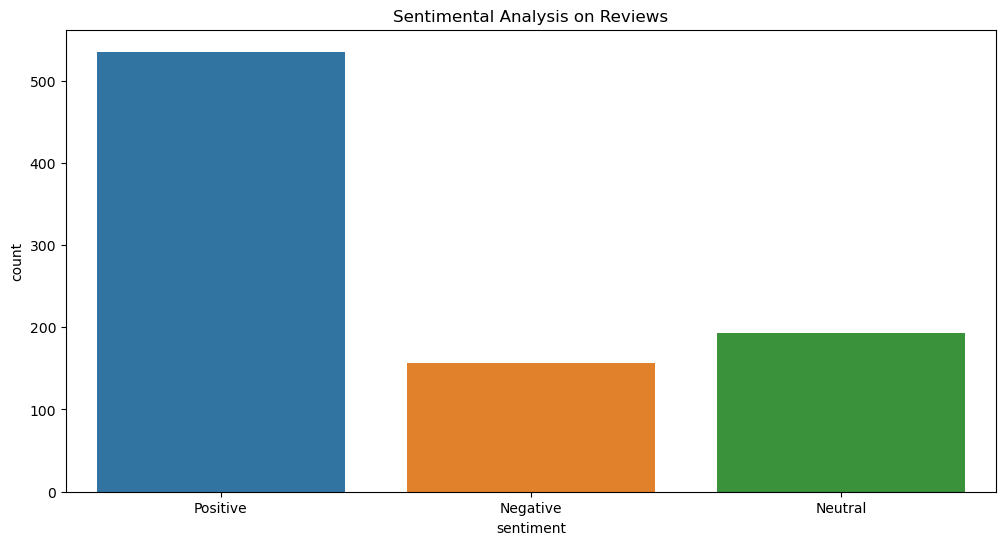

In [96]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)
plt.title('Sentimental Analysis on Reviews')
plt.show()

<h4>Observations:</h4>
The Positive reviews are high as compared to others<br>
The One-Plus mobile phones has high postitive reviews which the product is good to use <br>
The Negative sentiments has lowest numbers of reviews 

<h4>Insights:</h4>
Firstly, we extract reviews from Amazon on Oneplus mobile phones using the method called web scrapping <br>
For it we have use NLP techniques from deep learing <br>
First, we cleaned the reviews using various tokenizers. We deleted unwanted data from the dataset <br>
Then using Named Entity Recognition (NER) we extract noun and verbs from the dataset for sentimental analysis <br>
We got the word <b> phone </b> which was occured in number of times in the reviews <br>
Using the sentimental analysis we got the words the from positive as well as negative reviews <br>
The product has high positive sentiment reviews,by which we can assume that the product is good to use.